In [18]:
!pip install --upgrade pillow

Looking in indexes: https://pypi.doubanio.com/simple
                                              0.0/2.5 MB ? eta -:--:--
                                              0.0/2.5 MB ? eta -:--:--
                                              0.0/2.5 MB 1.3 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                                        0.1/2.5 MB 1.6 MB/s eta 0:00:02
     -                   

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [36]:
import pandas as pd
df = pd.DataFrame([[123.000,'2021-01-01',132.97],[321.087,'2021-01-02',312.983],[142.021,'2021-01-03',123.54],[128.021,'2021-01-04',127.54],[112.021,'2021-01-05',120.54]],columns=['Close','Date','Open'])

In [21]:
df

,Close,Date,Open
0,123.000,2021-01-01,132.970
1,321.087,2021-01-02,312.983
2,142.021,2021-01-03,123.540
3,128.021,2021-01-04,127.540
4,112.021,2021-01-05,120.540


In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   5 non-null      float64       
 1   Date    5 non-null      datetime64[ns]
 2   Open    5 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 248.0 bytes


In [38]:
df.set_index('Date',inplace=True)

In [7]:
df

,Close,Open
Date,,
2021-01-01,123.000,132.970
2021-01-02,321.087,312.983
2021-01-03,142.021,123.540
2021-01-04,128.021,127.540
2021-01-05,112.021,120.540


<Axes: title={'center': 'dsa'}, xlabel='Date'>

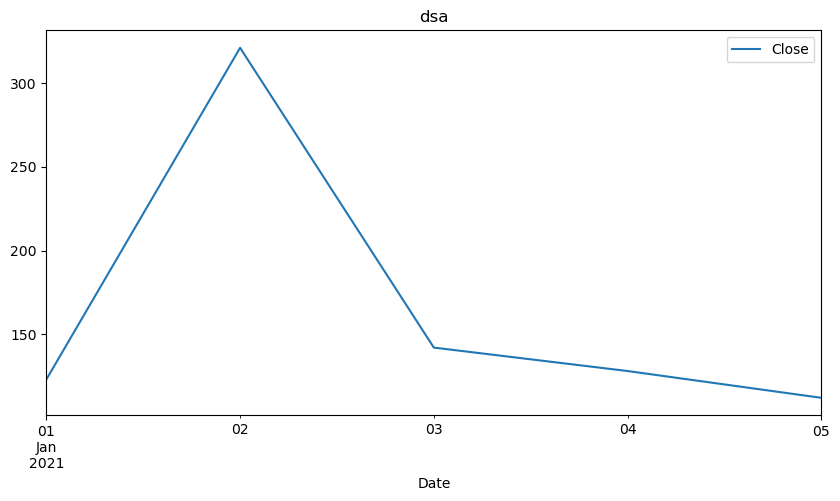

In [39]:
df['Close'].plot(kind='line',figsize=[10,5],title='dsa',legend=True)

### 计算五日均线

In [40]:
df['mean'] = df['Close'].rolling(window=5).mean()
df

,Close,Open,mean
Date,,,
2021-01-01,123.000,132.970,NaN
2021-01-02,321.087,312.983,NaN
2021-01-03,142.021,123.540,NaN
2021-01-04,128.021,127.540,NaN
2021-01-05,112.021,120.540,165.23


<Axes: xlabel='Date'>

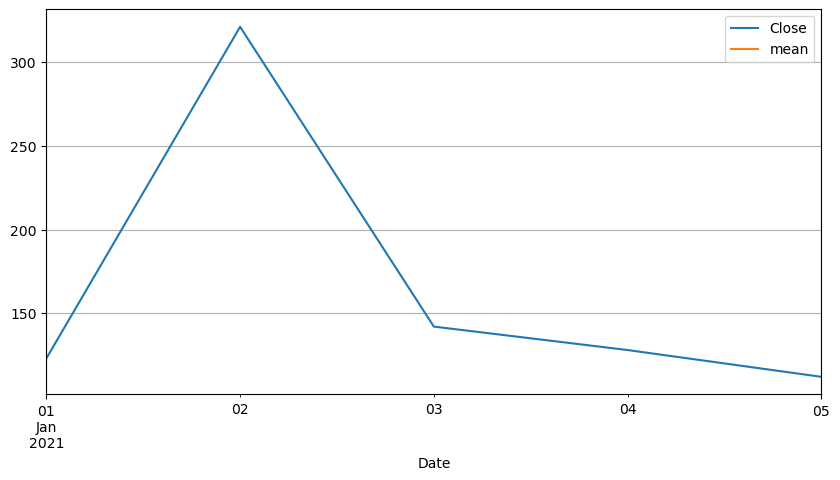

In [41]:
df[['Close','mean']].plot(kind='line',figsize=[10,5],legend=True,grid=True)

<Axes: xlabel='Date'>

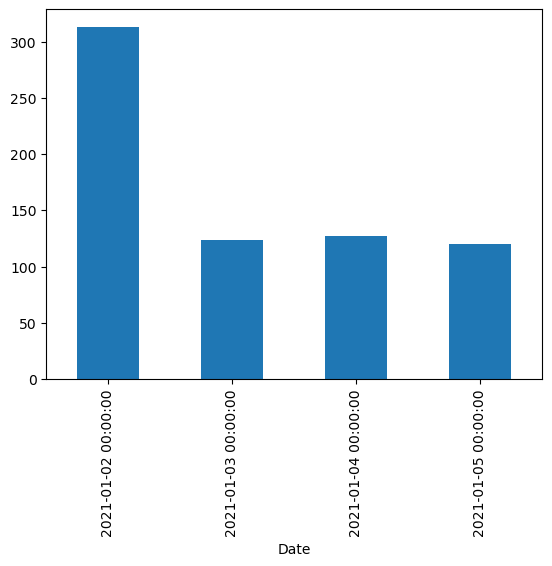

In [42]:
df.loc[df.index>'2021-01-01','Open'].plot(kind='bar')

In [43]:
df['diff'] = df['Close'] - df['Open']

In [44]:
df

,Close,Open,mean,diff
Date,,,,
2021-01-01,123.000,132.970,NaN,-9.970
2021-01-02,321.087,312.983,NaN,8.104
2021-01-03,142.021,123.540,NaN,18.481
2021-01-04,128.021,127.540,NaN,0.481
2021-01-05,112.021,120.540,165.23,-8.519


In [46]:
df['rize'] = df['diff']>0
df['fall'] = df['diff']<0
df

,Close,Open,mean,diff,rize,fall
Date,,,,,,
2021-01-01,123.000,132.970,NaN,-9.970,False,True
2021-01-02,321.087,312.983,NaN,8.104,True,False
2021-01-03,142.021,123.540,NaN,18.481,True,False
2021-01-04,128.021,127.540,NaN,0.481,True,False
2021-01-05,112.021,120.540,165.23,-8.519,False,True


<Axes: >

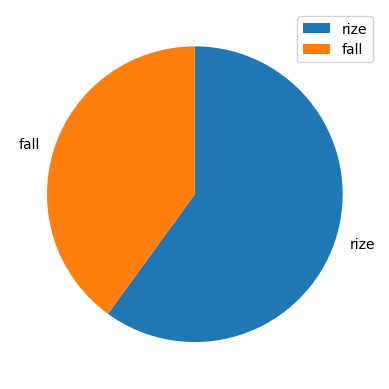

In [52]:
df[['rize','fall']].sum().plot(kind='pie',legend=True,counterclock=False,startangle=90)

<Axes: ylabel='Frequency'>

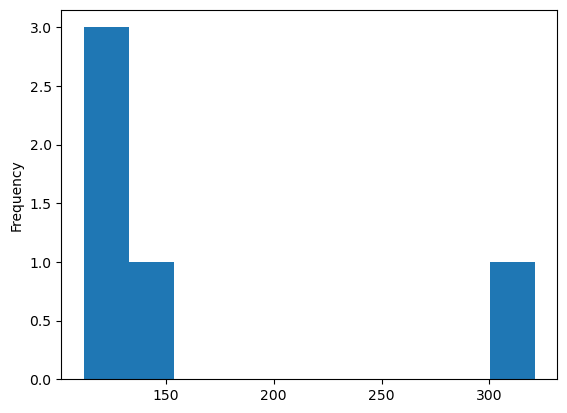

In [53]:
df['Close'].plot(kind='hist')

In [54]:
df['ret'] = df['Close'].pct_change(1)
df

,Close,Open,mean,diff,rize,fall,ret
Date,,,,,,,
2021-01-01,123.000,132.970,NaN,-9.970,False,True,NaN
2021-01-02,321.087,312.983,NaN,8.104,True,False,1.610463
2021-01-03,142.021,123.540,NaN,18.481,True,False,-0.557687
2021-01-04,128.021,127.540,NaN,0.481,True,False,-0.098577
2021-01-05,112.021,120.540,165.23,-8.519,False,True,-0.124979


<Axes: ylabel='Frequency'>

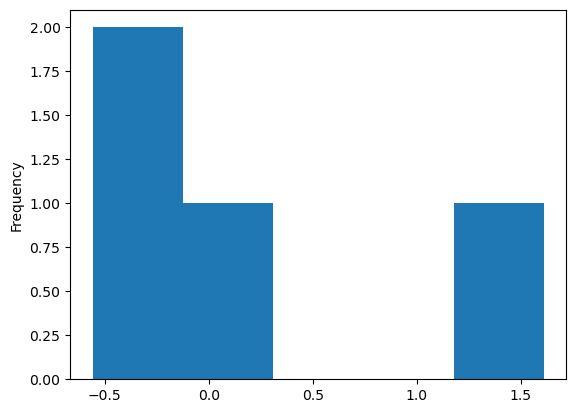

In [57]:
df['ret'].plot(kind='hist',bins=5)

<Axes: >

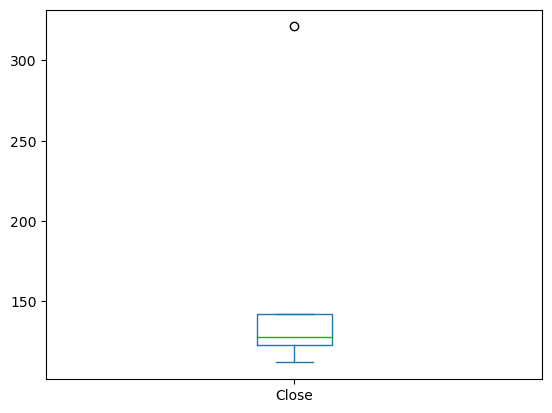

In [58]:
df['Close'].plot(kind='box')

<Axes: xlabel='Date'>

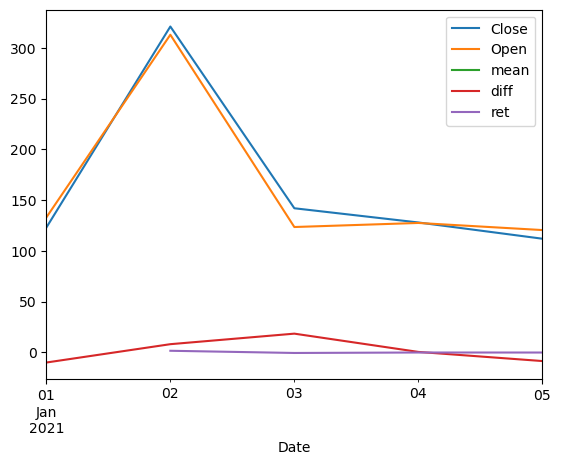

In [59]:
df.plot(kind='line')

<Axes: xlabel='Close', ylabel='Open'>

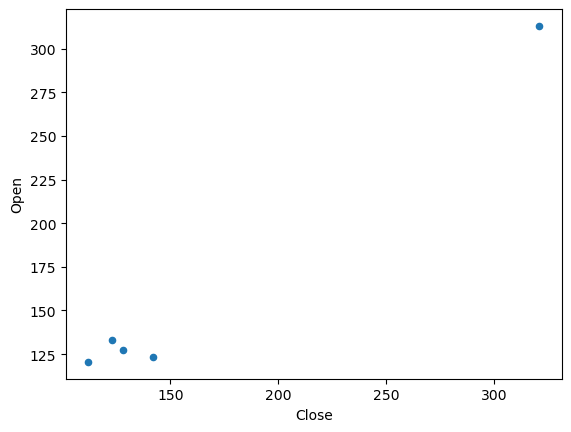

In [64]:
df.plot(kind='scatter',x='Close',y='Open')